In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from keras.layers import Input, Dense
from keras.models import Model

In [205]:
data = "/Users/sindhujach/Desktop/ECE_699/Traffic_simulation/weeklytask-16-11-23/fcd_output.xlsx"
df = pd.read_excel(data)

In [206]:
df

,id,x,y,angle,type,speed,pos,lane,slope,time
0,flow_aggressive_E.0,94.90,101.60,270.00,aggressive,11.54,5.10,-E31_1,0.0,0.0
1,flow_aggressive_N.0,-101.60,294.90,180.00,aggressive,14.31,5.10,-E30_1,0.0,0.0
2,flow_aggressive_W.0,-294.90,98.40,90.00,aggressive,14.53,5.10,-E29_1,0.0,0.0
3,flow_default_E.0,94.90,104.80,270.00,default,13.03,5.10,-E31_0,0.0,0.0
4,flow_default_N.0,-104.80,294.90,180.00,default,14.72,5.10,-E30_0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
898378,flow_tailgater_E.49,-71.21,204.71,277.56,tailgater,2.81,131.71,E26_0,0.0,1499.9
898379,flow_tailgater_E.50,-30.16,190.01,307.94,tailgater,7.80,88.37,E26_0,0.0,1499.9
898380,flow_tailgater_N.46,5.66,91.82,3.76,tailgater,5.07,2.37,:J2_2_0,0.0,1499.9
898381,flow_tailgater_N.47,-81.77,-1.90,79.35,tailgater,11.79,8.38,E28_0,0.0,1499.9


In [207]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])
df['id'] = label_encoder.fit_transform(df['id'])


In [208]:
df = df.drop('lane', axis = 1)
df.corr()

,id,x,y,angle,type,speed,pos,slope,time
id,1.000000,-0.022876,-0.072564,-0.084064,0.982011,0.060709,-0.024587,NaN,0.048835
x,-0.022876,1.000000,-0.001730,-0.051120,-0.043468,-0.228444,0.094873,NaN,-0.072976
y,-0.072564,-0.001730,1.000000,0.615984,-0.012503,-0.162549,0.064893,NaN,-0.049343
angle,-0.084064,-0.051120,0.615984,1.000000,-0.003408,-0.055082,-0.155063,NaN,-0.053060
type,0.982011,-0.043468,-0.012503,-0.003408,1.000000,0.060142,-0.022533,NaN,0.024492
speed,0.060709,-0.228444,-0.162549,-0.055082,0.060142,1.000000,-0.443779,NaN,0.033943
pos,-0.024587,0.094873,0.064893,-0.155063,-0.022533,-0.443779,1.000000,NaN,0.009026
slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,0.048835,-0.072976,-0.049343,-0.053060,0.024492,0.033943,0.009026,NaN,1.000000


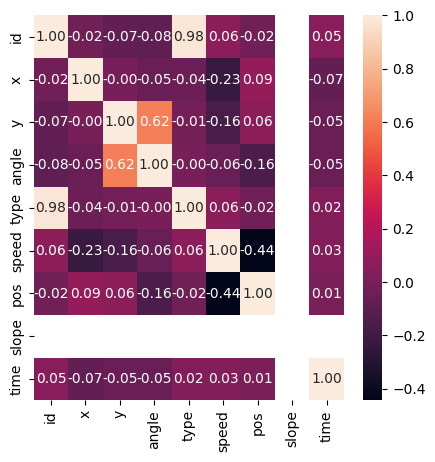

In [209]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Mean, Standard Deviation and Variance 

In [210]:
mean_val = df.groupby(['id', 'type']).mean().reset_index()
std_val = df.groupby(['id','type']).std().reset_index()
var_val = df.groupby(['id','type']).std().reset_index()

#Merge the mean, std and var DataFrames

final = pd.merge(mean_val, std_val, on = ['id', 'type'], suffixes = ('_mean', '_std'))
final = pd.merge(final, var_val, on = ['id', 'type'], suffixes = ('', '_var'))

print(final)

        id  type      x_mean      y_mean  angle_mean  speed_mean   pos_mean  \
0        0     0 -111.362857  158.723722  255.028873    4.175902  73.541053   
1        1     0   10.288419  134.389170  299.514150    8.949328  52.536996   
2        2     0   21.273097  122.439677  303.950968   11.176645  40.186323   
3        3     0  -83.975854  172.238729  276.091948    5.327854  83.573208   
4        4     0  -54.006320  181.575553  286.581088    3.842233  87.318165   
...    ...   ...         ...         ...         ...         ...        ...   
1020  1020     6 -153.533750  184.574138  206.256466   10.566940  68.194698   
1021  1021     6 -156.754273  137.150759  181.393579    8.695705  60.466312   
1022  1022     6  -97.025227   79.561212  107.762404    4.616687  74.480282   
1023  1023     6 -111.844236  100.852843  142.063063    4.334948  70.044883   
1024  1024     6 -151.893011  198.786547  222.042928    5.353646  57.239006   

      slope_mean  time_mean      x_std  ...    pos_

In [211]:
final.fillna(value=0, inplace = True)
final

,id,type,x_mean,y_mean,angle_mean,speed_mean,pos_mean,slope_mean,time_mean,x_std,...,pos_std,slope_std,time_std,x,y,angle,speed,pos,slope,time
0,0,0,-111.362857,158.723722,255.028873,4.175902,73.541053,0.0,61.20,93.954559,...,44.961572,0.0,35.377135,93.954559,40.600845,39.102459,3.611437,44.961572,0.0,35.377135
1,1,0,10.288419,134.389170,299.514150,8.949328,52.536996,0.0,14.60,39.415335,...,36.658200,0.0,7.317900,39.415335,37.090467,32.700967,3.111169,36.658200,0.0,7.317900
2,2,0,21.273097,122.439677,303.950968,11.176645,40.186323,0.0,262.20,30.565059,...,27.440261,0.0,4.488875,30.565059,24.780663,36.149843,3.117994,27.440261,0.0,4.488875
3,3,0,-83.975854,172.238729,276.091948,5.327854,83.573208,0.0,324.15,81.030452,...,48.774749,0.0,27.727243,81.030452,40.394990,35.097609,4.964081,48.774749,0.0,27.727243
4,4,0,-54.006320,181.575553,286.581088,3.842233,87.318165,0.0,362.60,57.405634,...,37.653166,0.0,30.527392,57.405634,31.441798,32.265534,4.818127,37.653166,0.0,30.527392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,6,-153.533750,184.574138,206.256466,10.566940,68.194698,0.0,1488.35,42.823971,...,49.814919,0.0,6.711681,42.823971,52.024006,31.283977,5.113180,49.814919,0.0,6.711681
1021,1021,6,-156.754273,137.150759,181.393579,8.695705,60.466312,0.0,166.80,41.469517,...,48.768953,0.0,13.322350,41.469517,82.066719,39.698841,4.797525,48.768953,0.0,13.322350
1022,1022,6,-97.025227,79.561212,107.762404,4.616687,74.480282,0.0,235.25,92.068606,...,47.502123,0.0,41.930061,92.068606,61.388670,76.483593,4.444389,47.502123,0.0,41.930061
1023,1023,6,-111.844236,100.852843,142.063063,4.334948,70.044883,0.0,273.65,79.399676,...,44.583649,0.0,44.585872,79.399676,79.584888,77.993326,3.642259,44.583649,0.0,44.585872


In [212]:
features = final.drop(['type'], axis = 1)

In [213]:
output = final['type']

In [214]:
print(type(output))

<class 'pandas.core.series.Series'>


In [215]:
output.value_counts()

type
1    208
0    155
2    153
3    153
5    153
6    102
4    101
Name: count, dtype: int64

/var/folders/0n/zwmcmxtn2cvg23pqmq5w29jh0000gn/T/ipykernel_3520/2471074704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=output_df, x = 'type', palette = 'viridis')


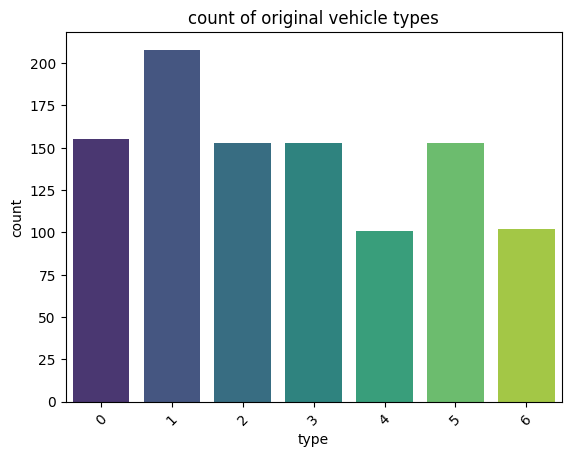

In [216]:
output_df = output.to_frame(name='type')
sns.countplot(data=output_df, x = 'type', palette = 'viridis')
plt.title('count of original vehicle types')
plt.xticks(rotation=45)
plt.show()

KMeans

In [146]:
param_grid = {
    'n_clusters' : [7],
    'init' : ['k_means++', 'random'],
    'max_iter' : [300, 500, 1000],
    'random_state' : [42]
}

kmeans_model = KMeans()
grid_search = GridSearchCV(kmeans_model, param_grid, cv=5)

grid_search.fit(features)

print('Best Parameters', grid_search.best_params_)

best_kmeans_model = grid_search.best_estimator_
df_clustered = features.copy()
df_clustered['cluster'] = best_kmeans_model.labels_


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Best Parameters {'init': 'random', 'max_iter': 300, 'n_clusters': 7, 'random_state': 42}


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 727, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklea

In [147]:
features

,id,x_mean,y_mean,angle_mean,speed_mean,pos_mean,slope_mean,time_mean,x_std,y_std,...,pos_std,slope_std,time_std,x,y,angle,speed,pos,slope,time
0,0,-111.362857,158.723722,255.028873,4.175902,73.541053,0.0,61.20,93.954559,40.600845,...,44.961572,0.0,35.377135,93.954559,40.600845,39.102459,3.611437,44.961572,0.0,35.377135
1,1,10.288419,134.389170,299.514150,8.949328,52.536996,0.0,14.60,39.415335,37.090467,...,36.658200,0.0,7.317900,39.415335,37.090467,32.700967,3.111169,36.658200,0.0,7.317900
2,2,21.273097,122.439677,303.950968,11.176645,40.186323,0.0,262.20,30.565059,24.780663,...,27.440261,0.0,4.488875,30.565059,24.780663,36.149843,3.117994,27.440261,0.0,4.488875
3,3,-83.975854,172.238729,276.091948,5.327854,83.573208,0.0,324.15,81.030452,40.394990,...,48.774749,0.0,27.727243,81.030452,40.394990,35.097609,4.964081,48.774749,0.0,27.727243
4,4,-54.006320,181.575553,286.581088,3.842233,87.318165,0.0,362.60,57.405634,31.441798,...,37.653166,0.0,30.527392,57.405634,31.441798,32.265534,4.818127,37.653166,0.0,30.527392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,-153.533750,184.574138,206.256466,10.566940,68.194698,0.0,1488.35,42.823971,52.024006,...,49.814919,0.0,6.711681,42.823971,52.024006,31.283977,5.113180,49.814919,0.0,6.711681
1021,1021,-156.754273,137.150759,181.393579,8.695705,60.466312,0.0,166.80,41.469517,82.066719,...,48.768953,0.0,13.322350,41.469517,82.066719,39.698841,4.797525,48.768953,0.0,13.322350
1022,1022,-97.025227,79.561212,107.762404,4.616687,74.480282,0.0,235.25,92.068606,61.388670,...,47.502123,0.0,41.930061,92.068606,61.388670,76.483593,4.444389,47.502123,0.0,41.930061
1023,1023,-111.844236,100.852843,142.063063,4.334948,70.044883,0.0,273.65,79.399676,79.584888,...,44.583649,0.0,44.585872,79.399676,79.584888,77.993326,3.642259,44.583649,0.0,44.585872


In [148]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

TSNE

In [149]:
tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 200, n_iter = 250, random_state = 42)
tsne_results = tsne.fit_transform(features)

In [150]:
print(tsne_results.shape)
print(type(tsne_results))

(1025, 2)
<class 'numpy.ndarray'>


In [151]:
tsne_results

array([[-0.01565156,  1.5104297 ],
       [ 1.1366068 ,  0.90272474],
       [ 1.139962  ,  0.8894797 ],
       ...,
       [-0.10016982,  0.14773926],
       [ 0.04045969,  0.22622386],
       [ 1.3407279 ,  0.579616  ]], dtype=float32)

In [152]:
tsne_df = pd.DataFrame(tsne_results, columns=['tsne-2d-one', 'tsne-2d-two'])

In [153]:
n_clusters = 7  # Example value, adjust based on your needs

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300, init='random')
tsne_df['cluster'] = kmeans.fit_predict(tsne_df[['tsne-2d-one', 'tsne-2d-two']])

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


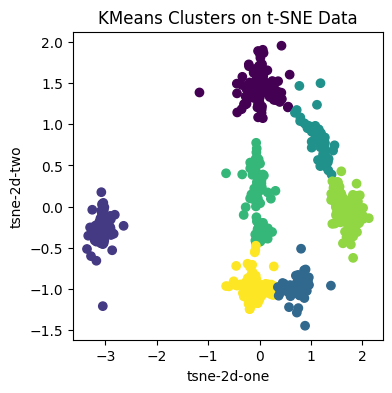

In [154]:
plt.figure(figsize=(4, 4))
plt.scatter(tsne_df['tsne-2d-one'], tsne_df['tsne-2d-two'], c=tsne_df['cluster'])
plt.title('KMeans Clusters on t-SNE Data')
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.show()

In [155]:
print(tsne_df['cluster'].value_counts())

cluster
5    213
1    184
0    183
6    167
2    110
4     85
3     83
Name: count, dtype: int64


/var/folders/0n/zwmcmxtn2cvg23pqmq5w29jh0000gn/T/ipykernel_3520/2098699552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=kmeans_tsne_df, x = 'type', palette = 'viridis')


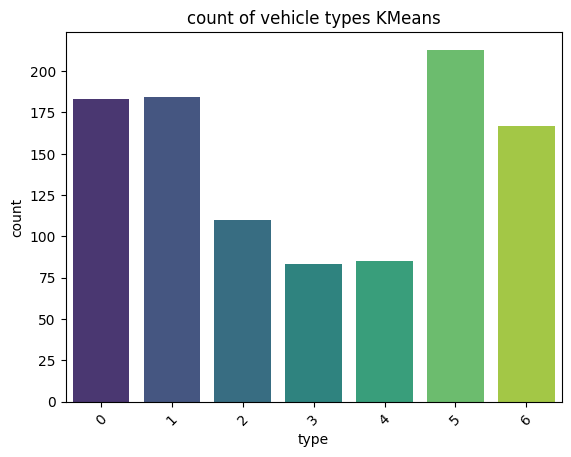

In [156]:
kmeans_tsne_df = tsne_df['cluster'].to_frame(name='type')
sns.countplot(data=kmeans_tsne_df, x = 'type', palette = 'viridis')
plt.title('count of vehicle types KMeans')
plt.xticks(rotation=45)
plt.show()

DBSCAN 

In [157]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

def find_best_params_dbscan(features, eps_values, min_samples_values):
    best_score = -1
    best_params = {'eps': None, 'min_samples': None}

    for eps in eps_values:
        for min_samples in min_samples_values:
            # Create DBSCAN model
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            # Fit the model
            labels = dbscan.fit_predict(features)

            # We calculate the silhouette score only if there are more than 1 cluster and less than n_samples - 1 clusters
            if len(set(labels)) > 1 and len(set(labels)) < features.shape[0] - 1:
                score = silhouette_score(features, labels)

                if score > best_score:
                    best_score = score
                    best_params['eps'] = eps
                    best_params['min_samples'] = min_samples

    return best_params


best_params = find_best_params_dbscan(features, eps_values, min_samples_values)
print('Best Parameters:', best_params)


Best Parameters: {'eps': 0.6, 'min_samples': 5}


In [158]:
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_dbscan.fit(features)
df_clustered = features.copy()
cluster_labels = best_dbscan.fit_predict(features)


In [159]:
import pandas as pd

# Convert the features array to a DataFrame
df_features = pd.DataFrame(features)

# Reset the index of the DataFrame
df_features.reset_index(drop=True, inplace=True)

# Assign the cluster labels to the DataFrame
df_features['cluster'] = cluster_labels

# Now df_features is your clustered DataFrame
df_clustered = df_features

In [160]:
eps = 0.5  # Example value, adjust based on your needs
min_samples = 5  # Example value, adjust based on your needs

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(tsne_results)

In [161]:
import pandas as pd

df_tsne_dbscan = pd.DataFrame(tsne_results, columns=['tsne-2d-one', 'tsne-2d-two'])
df_tsne_dbscan['cluster'] = dbscan_labels

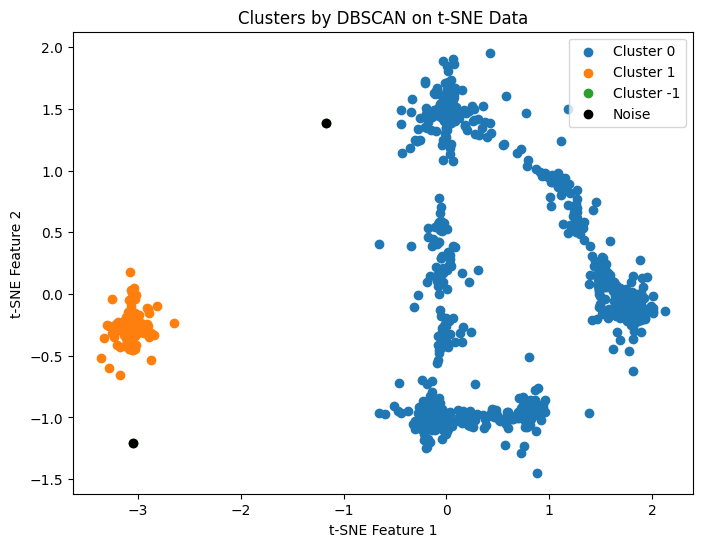

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot each cluster
unique_clusters = set(dbscan_labels)
for cluster in unique_clusters:
    cluster_data = df_tsne_dbscan[df_tsne_dbscan['cluster'] == cluster]
    plt.scatter(cluster_data['tsne-2d-one'], cluster_data['tsne-2d-two'], label=f'Cluster {cluster}')

# If DBSCAN labeled any point as noise (-1), it will be plotted separately
if -1 in unique_clusters:
    plt.scatter(df_tsne_dbscan[df_tsne_dbscan['cluster'] == -1]['tsne-2d-one'], 
                df_tsne_dbscan[df_tsne_dbscan['cluster'] == -1]['tsne-2d-two'], 
                color='black', label='Noise')

plt.title('Clusters by DBSCAN on t-SNE Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()


Hierarchical Clustering

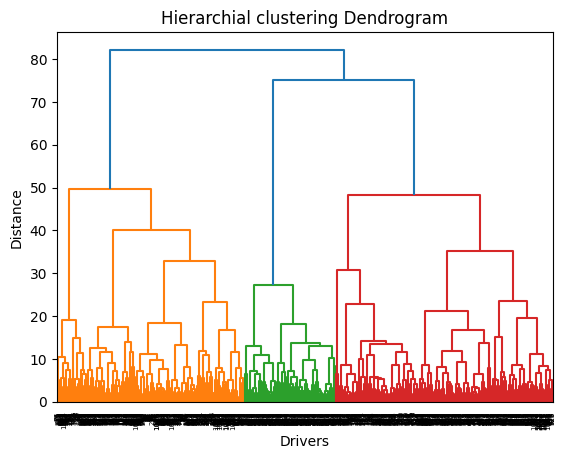

0    225
2    187
1    173
6    150
4    126
5    102
3     62
Name: count, dtype: int64


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [163]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(features, method = 'ward')

dendrogram(linkage_matrix)
plt.title('Hierarchial clustering Dendrogram')
plt.xlabel('Drivers')
plt.ylabel('Distance')
plt.show()

num_clusters = 7
model = AgglomerativeClustering(n_clusters=num_clusters, 
    affinity='euclidean', 
    memory=None, 
    connectivity=None, 
    compute_full_tree='auto', 
    linkage='ward', 
    distance_threshold=None)

#features['cluster'] = model.fit_predict(features)
cluster_labels_agg = model.fit_predict(features)

# Convert to Pandas Series
cluster_labels_series = pd.Series(cluster_labels_agg)


print(cluster_labels_series.value_counts())

In [164]:
num_clusters = 7
model = AgglomerativeClustering(n_clusters=num_clusters, 
    affinity='euclidean', 
    memory=None, 
    connectivity=None, 
    compute_full_tree='auto', 
    linkage='ward', 
    distance_threshold=None)

cluster_labels_1 = model.fit_predict(tsne_results)

# You can also create a linkage matrix for dendrogram
linkage_matrix = linkage(tsne_results, method='ward')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


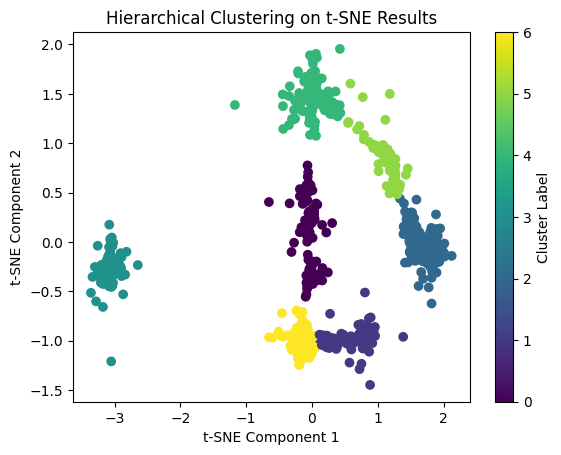

In [166]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels_1, cmap='viridis')
plt.title('Hierarchical Clustering on t-SNE Results')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [168]:
cluster_labels_series_1 = pd.Series(cluster_labels_1)
print(cluster_labels_series_1.value_counts())

2    215
3    184
4    180
6    145
1    129
0     88
5     84
Name: count, dtype: int64


/var/folders/0n/zwmcmxtn2cvg23pqmq5w29jh0000gn/T/ipykernel_3520/448368129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cluster_labels_series_1, palette = 'viridis')


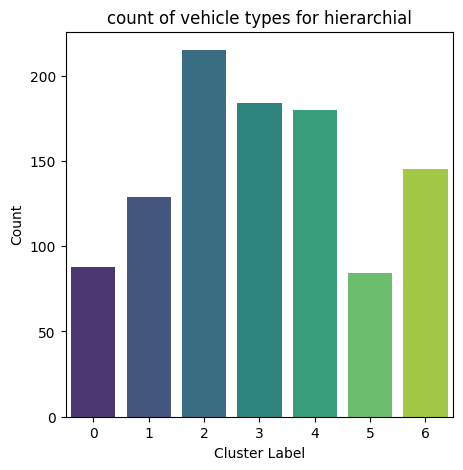

In [169]:
plt.figure(figsize=(5, 5))
sns.countplot(x=cluster_labels_series_1, palette = 'viridis')
plt.title('count of vehicle types for hierarchial')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

Independent Component Analysis(ICA)

In [170]:
from sklearn.decomposition import FastICA
n_components = 2
ica = FastICA(n_components = n_components, random_state = 42)
ica_components = ica.fit_transform(features)

/usr/local/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:613: RuntimeWarning: invalid value encountered in divide
  K = (u / d).T[:n_components]  # see (6.33) p.140


In [171]:
# Convert the ICA result to a DataFrame
ica_df = pd.DataFrame(ica_components, columns=[f'IC{i+1}' for i in range(n_components)])

# Display the first few rows to see the components
print(ica_df.head())

        IC1       IC2
0  0.505301 -0.072149
1 -0.782200  1.454011
2 -1.158255  2.210275
3  0.897267 -0.315814
4  0.008310  0.149038


Apply Kmeans Clustering

In [172]:
print(ica_components.shape)
print(df.shape)

(1025, 2)
(898383, 9)


In [173]:
n_clusters = 7  # Example value, adjust based on your needs

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300, init='random')
ica_df['cluster'] = kmeans.fit_predict(ica_df[['IC1', 'IC2']])

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


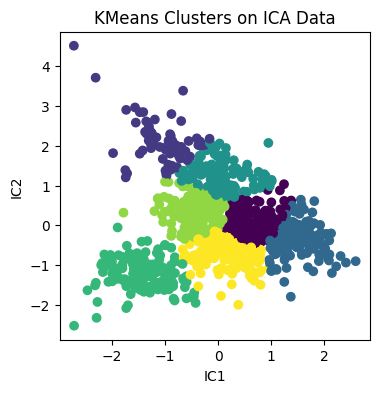

In [174]:
plt.figure(figsize=(4, 4))
plt.scatter(ica_df['IC1'], ica_df['IC2'], c=ica_df['cluster'])
plt.title('KMeans Clusters on ICA Data')
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.show()

In [175]:
print(ica_df['cluster'].value_counts())

cluster
4    172
2    171
5    166
0    160
6    153
3    133
1     70
Name: count, dtype: int64


/var/folders/0n/zwmcmxtn2cvg23pqmq5w29jh0000gn/T/ipykernel_3520/2561226407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=kmeans_ica_df, x = 'type', palette = 'viridis')


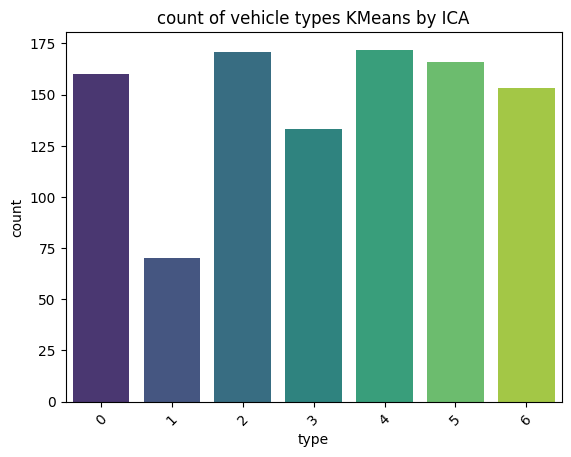

In [176]:
kmeans_ica_df = ica_df['cluster'].to_frame(name='type')
sns.countplot(data=kmeans_ica_df, x = 'type', palette = 'viridis')
plt.title('count of vehicle types KMeans by ICA')
plt.xticks(rotation=45)
plt.show()

Apply DBSCAN Clustering

In [177]:
eps = 0.5  # Example value, adjust based on your needs
min_samples = 5  # Example value, adjust based on your needs

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(ica_components)

In [178]:
import pandas as pd

df_ica_dbscan = pd.DataFrame(ica_components, columns=['IC1', 'IC2'])
df_ica_dbscan['cluster'] = dbscan_labels

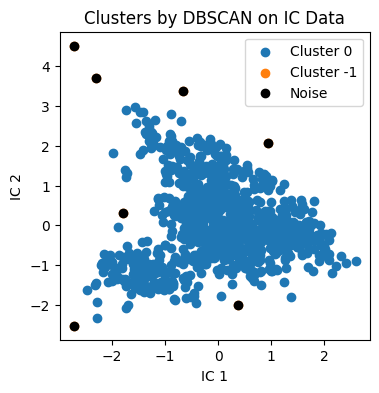

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

# Plot each cluster
unique_clusters = set(dbscan_labels)
for cluster in unique_clusters:
    cluster_data = df_ica_dbscan[df_ica_dbscan['cluster'] == cluster]
    plt.scatter(cluster_data['IC1'], cluster_data['IC2'], label=f'Cluster {cluster}')

# If DBSCAN labeled any point as noise (-1), it will be plotted separately
if -1 in unique_clusters:
    plt.scatter(df_ica_dbscan[df_ica_dbscan['cluster'] == -1]['IC1'], 
                df_ica_dbscan[df_ica_dbscan['cluster'] == -1]['IC2'], 
                color='black', label='Noise')

plt.title('Clusters by DBSCAN on IC Data')
plt.xlabel('IC 1')
plt.ylabel('IC 2')
plt.legend()
plt.show()


Hierarchical Clustering

In [180]:
num_clusters = 7
model = AgglomerativeClustering(n_clusters=num_clusters, 
    affinity='euclidean', 
    memory=None, 
    connectivity=None, 
    compute_full_tree='auto', 
    linkage='ward', 
    distance_threshold=None)

cluster_labels_2 = model.fit_predict(ica_components)

# You can also create a linkage matrix for dendrogram
linkage_matrix = linkage(tsne_results, method='ward')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


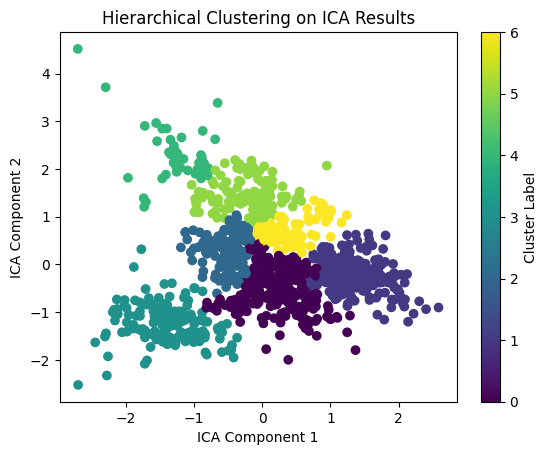

In [181]:
plt.scatter(ica_components[:, 0], ica_components[:, 1], c=cluster_labels_2, cmap='viridis')
plt.title('Hierarchical Clustering on ICA Results')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [182]:
cluster_labels_series_2 = pd.Series(cluster_labels_2)
print(cluster_labels_series_2.value_counts())

0    249
1    221
3    170
2    138
5    118
6     82
4     47
Name: count, dtype: int64


/var/folders/0n/zwmcmxtn2cvg23pqmq5w29jh0000gn/T/ipykernel_3520/1905668347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cluster_labels_series_2, palette = 'viridis')


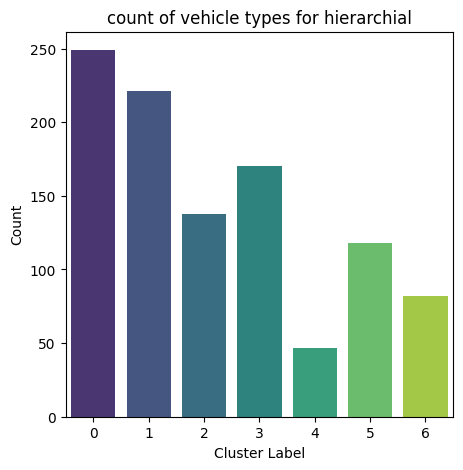

In [183]:
plt.figure(figsize=(5, 5))
sns.countplot(x=cluster_labels_series_2, palette = 'viridis')
plt.title('count of vehicle types for hierarchial')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

PCA

In [184]:
# Initialize PCA
pca = PCA(n_components=2, random_state=42)

# Assuming 'features' is your original data
# Fit and transform the data to reduce its dimensions
pca_results = pca.fit_transform(features)

In [185]:
# Convert the ICA result to a DataFrame
pca_df = pd.DataFrame(pca_results, columns=[f'PCA{i+1}' for i in range(n_components)])

# Display the first few rows to see the components
print(pca_df.head())

       PCA1      PCA2
0 -0.111123 -0.956649
1  3.157514  1.591771
2  4.802815  2.361768
3 -0.614786 -1.714236
4  0.332291 -0.003323


Apply KMeans Clustering

In [186]:
n_clusters = 7  # Example value, adjust based on your needs

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300, init='random')
pca_df['cluster'] = kmeans.fit_predict(pca_df[['PCA1', 'PCA2']])

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


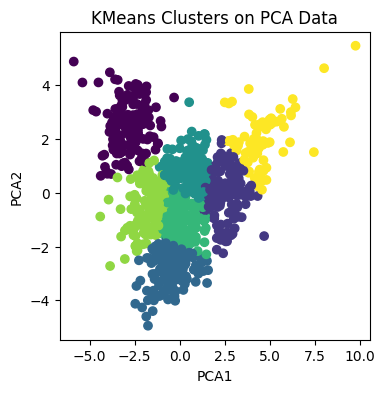

In [187]:
plt.figure(figsize=(4, 4))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'])
plt.title('KMeans Clusters on PCA Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [188]:
print(pca_df['cluster'].value_counts())

cluster
2    178
0    174
4    158
3    154
1    146
5    137
6     78
Name: count, dtype: int64


/var/folders/0n/zwmcmxtn2cvg23pqmq5w29jh0000gn/T/ipykernel_3520/3103724009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=kmeans_pca_df, x = 'type', palette = 'viridis')


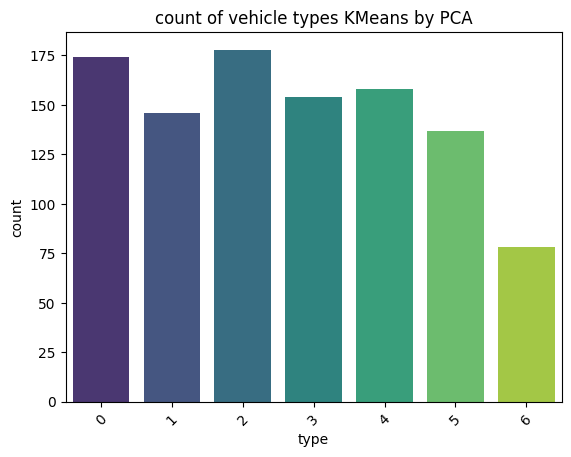

In [217]:
kmeans_pca_df = pca_df['cluster'].to_frame(name='type')
sns.countplot(data=kmeans_pca_df, x = 'type', palette = 'viridis')
plt.title('count of vehicle types KMeans by PCA')
plt.xticks(rotation=45)
plt.show()

Apply DBSCAN Clustering

In [189]:
eps = 0.5  # Example value, adjust based on your needs
min_samples = 5  # Example value, adjust based on your needs

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(pca_results)

In [190]:
import pandas as pd

df_pca_dbscan = pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])
df_pca_dbscan['cluster'] = dbscan_labels

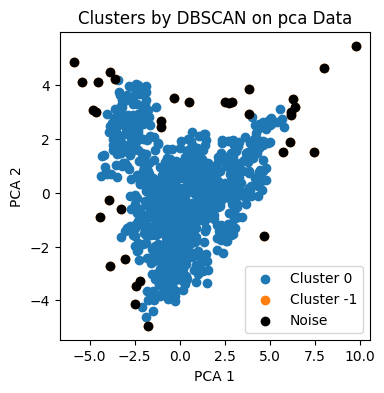

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

# Plot each cluster
unique_clusters = set(dbscan_labels)
for cluster in unique_clusters:
    cluster_data = df_pca_dbscan[df_pca_dbscan['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

# If DBSCAN labeled any point as noise (-1), it will be plotted separately
if -1 in unique_clusters:
    plt.scatter(df_pca_dbscan[df_pca_dbscan['cluster'] == -1]['PCA1'], 
                df_pca_dbscan[df_pca_dbscan['cluster'] == -1]['PCA2'], 
                color='black', label='Noise')

plt.title('Clusters by DBSCAN on pca Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


Hierarchical Clustering

In [192]:
num_clusters = 7
model = AgglomerativeClustering(n_clusters=num_clusters, 
    affinity='euclidean', 
    memory=None, 
    connectivity=None, 
    compute_full_tree='auto', 
    linkage='ward', 
    distance_threshold=None)

cluster_labels_3 = model.fit_predict(pca_results)

# You can also create a linkage matrix for dendrogram
linkage_matrix = linkage(pca_results, method='ward')


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


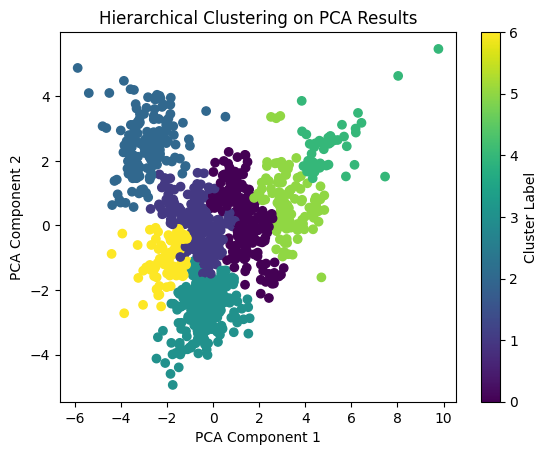

In [193]:
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=cluster_labels_3, cmap='viridis')
plt.title('Hierarchical Clustering on PCA Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [194]:
cluster_labels_series_3 = pd.Series(cluster_labels_3)
print(cluster_labels_series_3.value_counts())

3    223
0    201
1    196
2    169
5    109
6     82
4     45
Name: count, dtype: int64


/var/folders/0n/zwmcmxtn2cvg23pqmq5w29jh0000gn/T/ipykernel_3520/2520753513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cluster_labels_series_3, palette = 'viridis')


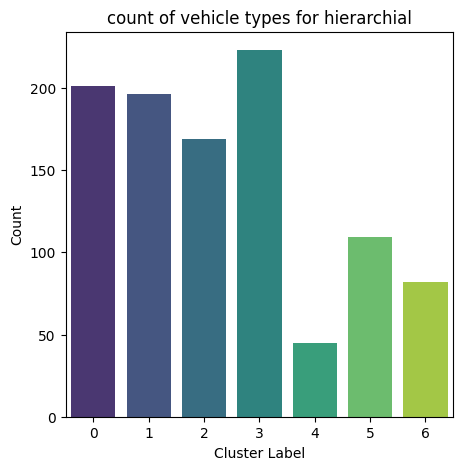

In [195]:
plt.figure(figsize=(5, 5))
sns.countplot(x=cluster_labels_series_3, palette = 'viridis')
plt.title('count of vehicle types for hierarchial')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()